# Exercises

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud
import acquire as a
import prepare as prep
import explore as ex

In [4]:
def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df

### 1.Spam Data

- a. Load the spam data set.

In [5]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
df = prep.prepare_data(df, 'text', ['i','she', 'he', 'you'])

In [7]:
df.head()

label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                               clean  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                             stemmed  \
0  go jurong point crazi avail bugi n great world...   
1                              ok lar joke wif u oni   
2  free entri 2 wkli comp win fa cup final tkt 21...   
3                u dun say earli hor u c alreadi say   
4          nah dont think goe usf live around though   

                                          lemmatized  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though

**- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

In [8]:
ham_words =' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)


In [9]:
ham_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune im gonna home soon dont want talk stuff anymore tonight k ive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching eh u remember 2 spell name yes v naughty make v wet fine thats way u feel thats way gota b seriously spell name im going try 2 month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left

In [10]:
#get frequencies
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [11]:
#create a table
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

ham  spam   all
u     1027   155  1182
im     457    13   470
get    314    83   397
2      305   173   478
ltgt   276     0   276

**spam_bigrams**

In [12]:
#spam_words

In [13]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))

In [14]:
spam_bigrams.head()

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object

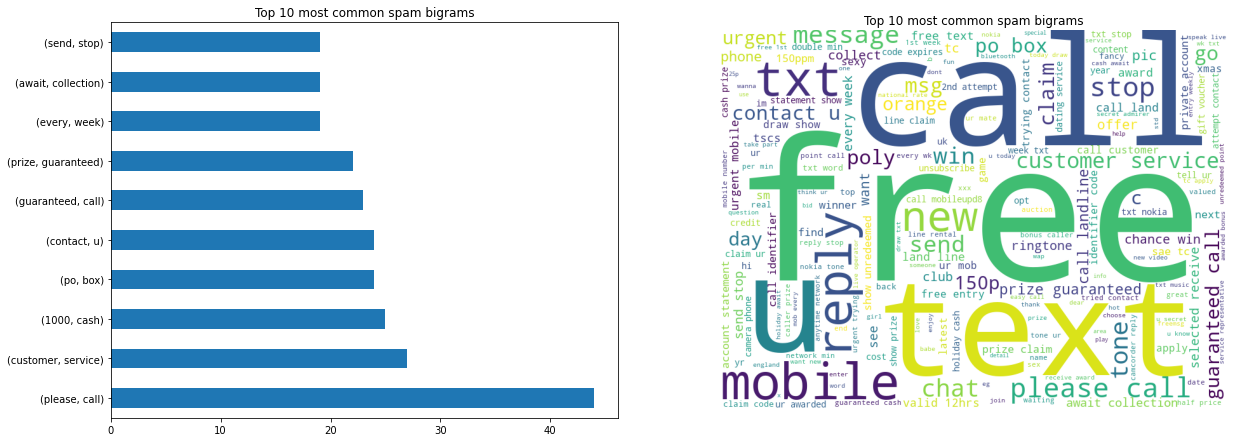

In [15]:
#plot just for one
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
spam_bigrams.value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')
plt.subplot(2,2,2)
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 10 most common spam bigrams')
#plt.tight_layout()
plt.show()

In [16]:
# def ngrams_wordcloud (text_list, title_list , n = 2 ):
#     '''
#     takes in a list of text as a string and a list of titles
#     '''
#     for i in  range (0, len(text_list)):
#         plt.figure(figsize=(20,16))
#         plt.subplot(2,2,1)
#         pd.Series(nltk.ngrams(text_list[i].split(), n= n)).value_counts().head(10).plot.barh()
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         plt.subplot(2,2,2)
#         img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
#         plt.imshow(img)
#         plt.axis('off')
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         #plt.tight_layout()
#         plt.show()

In [17]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

In [18]:
#text_list= [spam_words, ham_words]

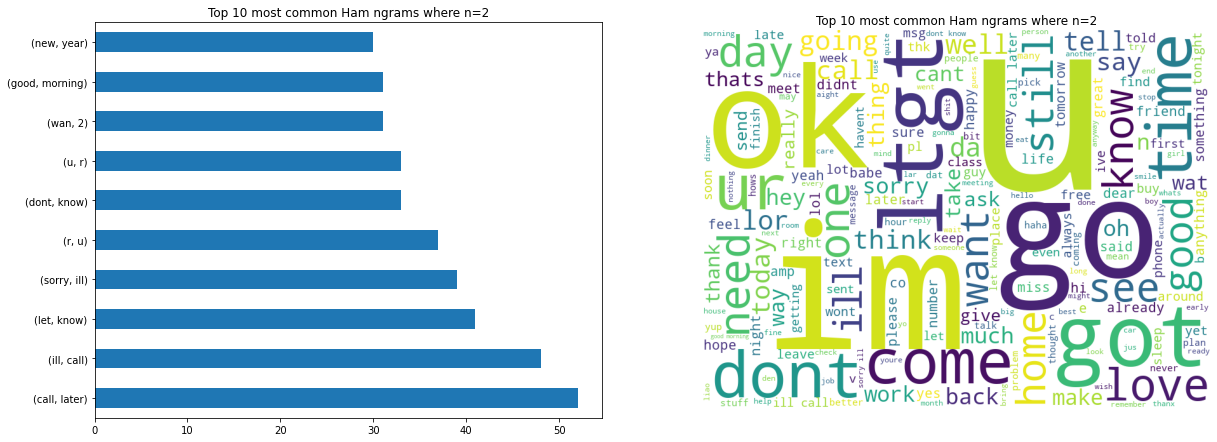

In [19]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'])

c. Is there any overlap in the bigrams for the spam data and the ham data?


***d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.***

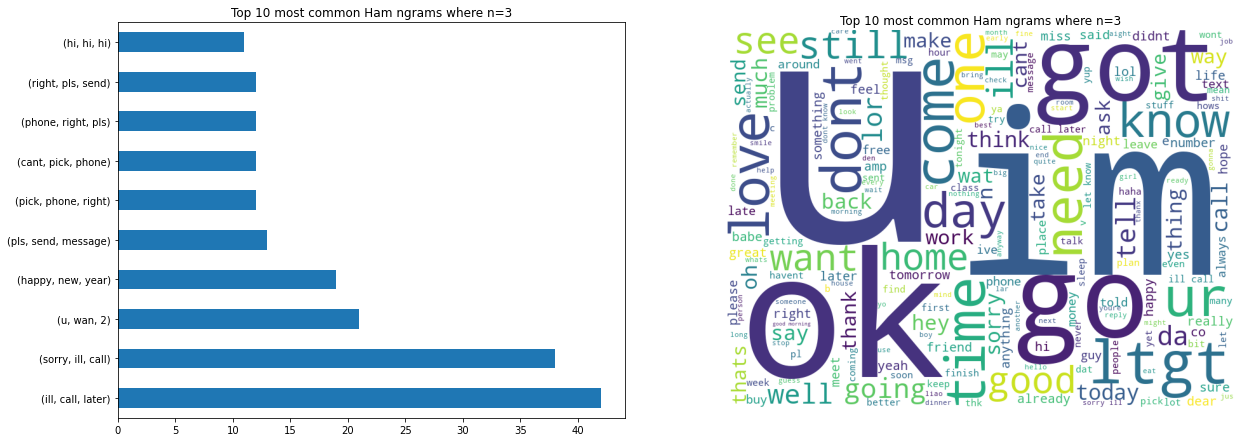

In [20]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'], n=3)

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [48]:
web_list = ['https://codeup.com/codeups-data-science-career-accelerator-is-here', 'https://codeup.com/data-science-myths',
            'https://codeup.com/data-science-vs-data-analytics-whats-the-difference',
            'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair',
            'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger']

In [49]:
list_articles = a.get_glob_articles(web_list)

In [50]:
list_articles.head()

title  \
0  Codeup’s Data Science Career Accelerator is Here!   
1                                 Data Science Myths   
2  Data Science VS Data Analytics: What’s The Dif...   
3        10 Tips to Crush It at the SA Tech Job Fair   
4  Competitor Bootcamps Are Closing. Is the Model...   

                                             content      published_date  
0  The rumors are true! The time has arrived. Cod...  September 30, 2018  
1  By Dimitri Antoniou and Maggie GiustData Scien...    October 31, 2018  
2  By Dimitri AntoniouA week ago, Codeuplaunched ...    October 17, 2018  
3  SA Tech Job FairThe third bi-annualSan Antonio...     August 14, 2018  
4  Competitor Bootcamps Are Closing. Is the Model...     August 14, 2018

In [51]:
 new_articles =prep.prepare_data(list_articles, 'content', ['weve'])

In [52]:
new_articles.head(10)

title  \
0  Codeup’s Data Science Career Accelerator is Here!   
1                                 Data Science Myths   
2  Data Science VS Data Analytics: What’s The Dif...   
3        10 Tips to Crush It at the SA Tech Job Fair   
4  Competitor Bootcamps Are Closing. Is the Model...   

                                             content      published_date  \
0  The rumors are true! The time has arrived. Cod...  September 30, 2018   
1  By Dimitri Antoniou and Maggie GiustData Scien...    October 31, 2018   
2  By Dimitri AntoniouA week ago, Codeuplaunched ...    October 17, 2018   
3  SA Tech Job FairThe third bi-annualSan Antonio...     August 14, 2018   
4  Competitor Bootcamps Are Closing. Is the Model...     August 14, 2018   

                                               clean  \
0  rumors true time arrived codeup officially ope...   
1  dimitri antoniou maggie giustdata science big ...   
2  dimitri antonioua week ago codeuplaunched imme...   
3  sa tech job fairthe third biannualsan antonio ...   
4  competitor bootcamps closing model dangeris pr...   

                                             stemmed  \
0  rumor true time arriv codeup offici open appli...   
1  dimitri antoni maggi giustdata scienc big data...   
2  dimitri antonioua week ago codeuplaunch immers...   
3  sa tech job fairth third biannualsan antonio t...   
4  competitor bootcamp close model dangeri progra...   

                                          lemmatized  
0  rumor true time arrived codeup officially open...  
1  dimitri antoniou maggie giustdata science big ...  
2  dimitri antonioua week ago codeuplaunched imme...  
3  sa tech job fairthe third biannualsan antonio ...  
4  competitor bootcamps closing model dangeris pr...

In [53]:
titles = list(new_articles['title'].value_counts().index)

In [54]:
# join all the text of each categotyb
join_text ={}
for ti in titles :
    join_text[ti] = prep.basic_clean(' '.join(new_articles[new_articles.title == ti].lemmatized))

# add all words 
join_text['all_words']= prep.basic_clean(' '.join(new_articles.lemmatized))

In [55]:
join_text.keys()

dict_keys(['Competitor Bootcamps Are Closing. Is the Model in Danger?', '10 Tips to Crush It at the SA Tech Job Fair', 'Data Science Myths', 'Codeup’s Data Science Career Accelerator is Here!', 'Data Science VS Data Analytics: What’s The Difference?', 'all_words'])

In [56]:

# create a word_count df
word_counts= pd.DataFrame()
for cat in join_text:
    word_counts[cat] = pd.Series(join_text[cat].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [57]:
word_counts.head()

Competitor Bootcamps Are Closing. Is the Model in Danger?  \
model                                                     12           
education                                                  7           
student                                                    5           
new                                                        4           
big                                                        4           

           10 Tips to Crush It at the SA Tech Job Fair  Data Science Myths  \
model                                                0                   0   
education                                            0                   0   
student                                              0                   0   
new                                                  2                   1   
big                                                  0                   1   

           Codeup’s Data Science Career Accelerator is Here!  \
model                                                      0   
education                                                  1   
student                                                    1   
new                                                        1   
big                                                        0   

           Data Science VS Data Analytics: What’s The Difference?  all_words  
model                                                      0              12  
education                                                  0               8  
student                                                    1               7  
new                                                        1               9  
big                                                        2               7

In [58]:
import matplotlib as mpl

<Figure size 1440x1080 with 0 Axes>

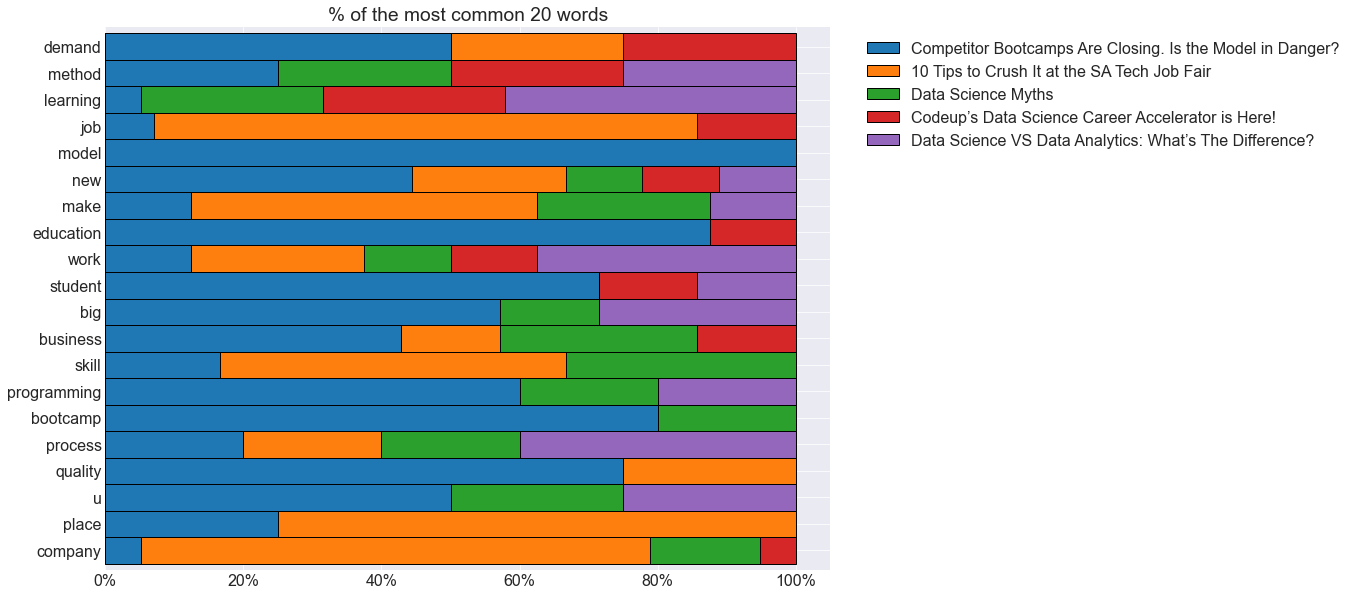

In [59]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1).sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

<Figure size 936x576 with 0 Axes>

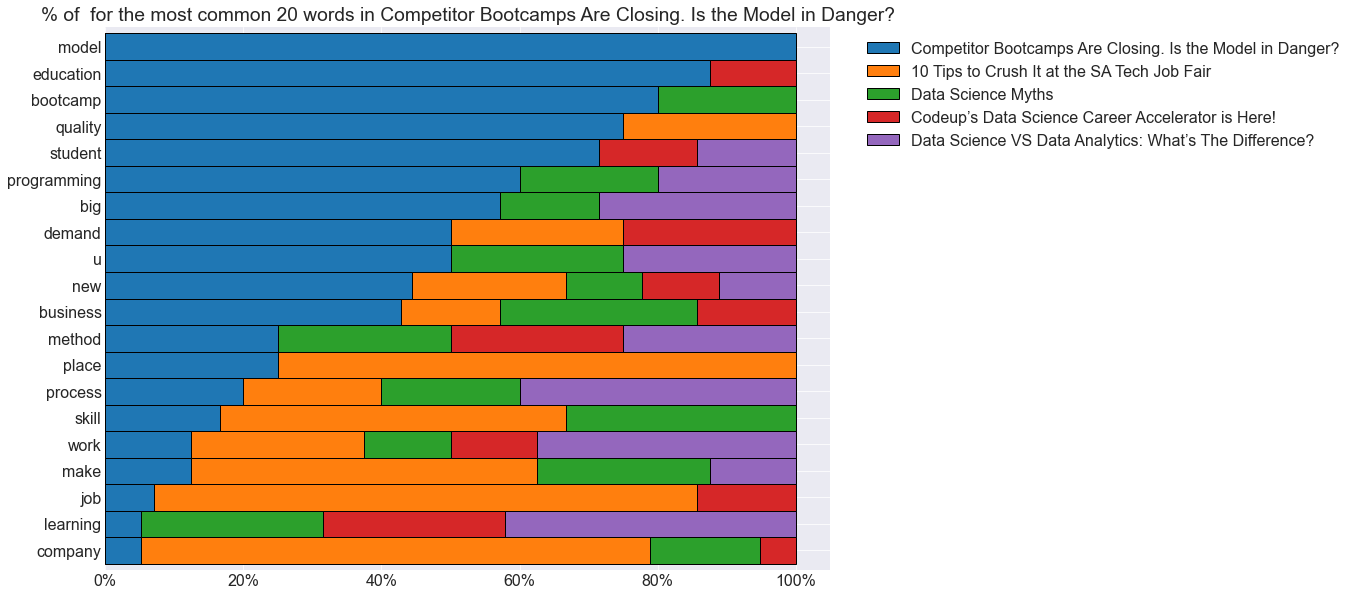

<Figure size 936x576 with 0 Axes>

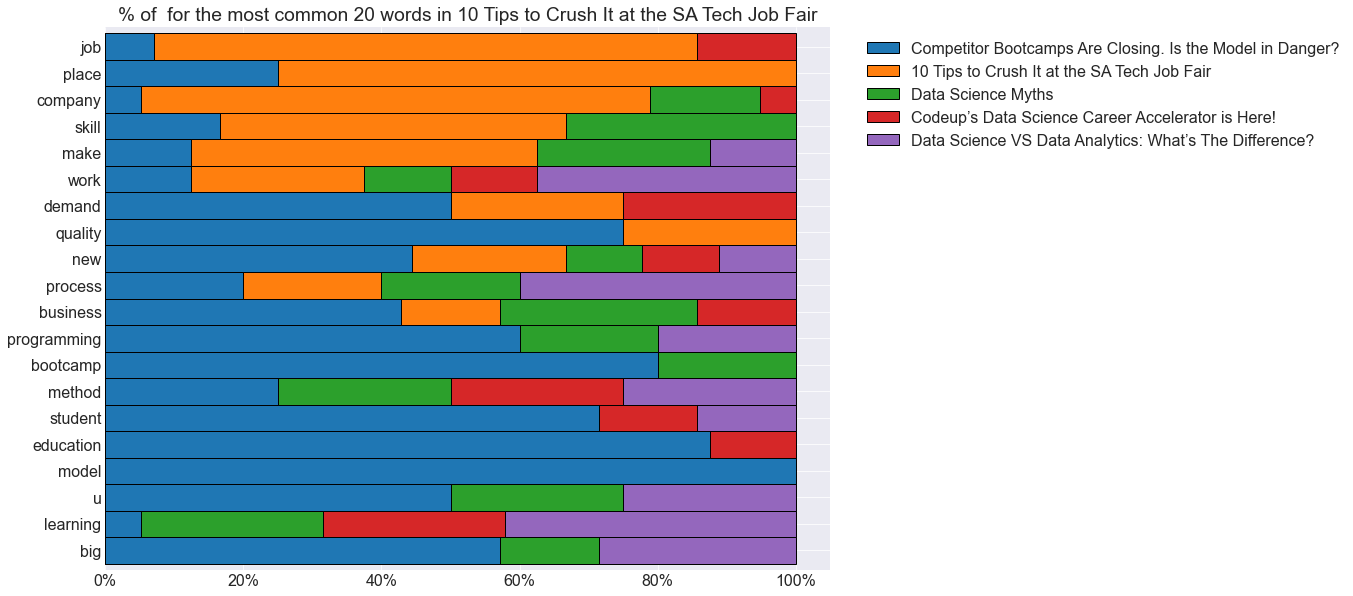

<Figure size 936x576 with 0 Axes>

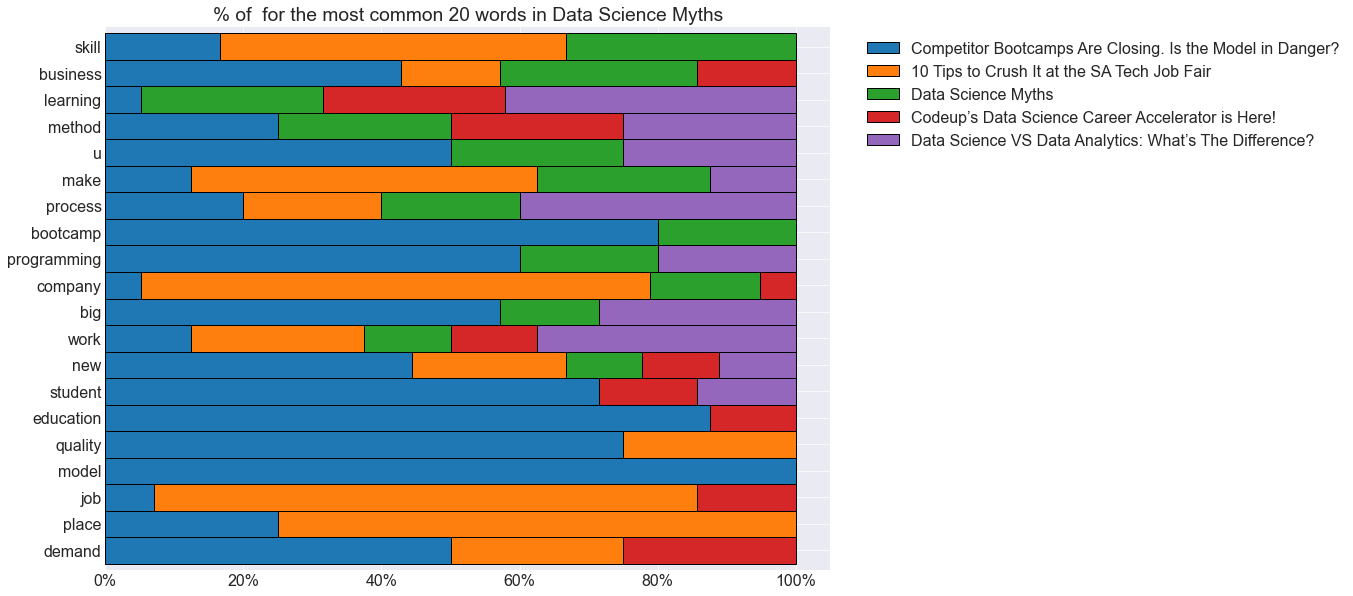

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

In [60]:
# Sorted by category 
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(13, 8))
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1).sort_values(by= column)
     .drop(columns='all_words')
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  for the most common 20 words in {column}')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

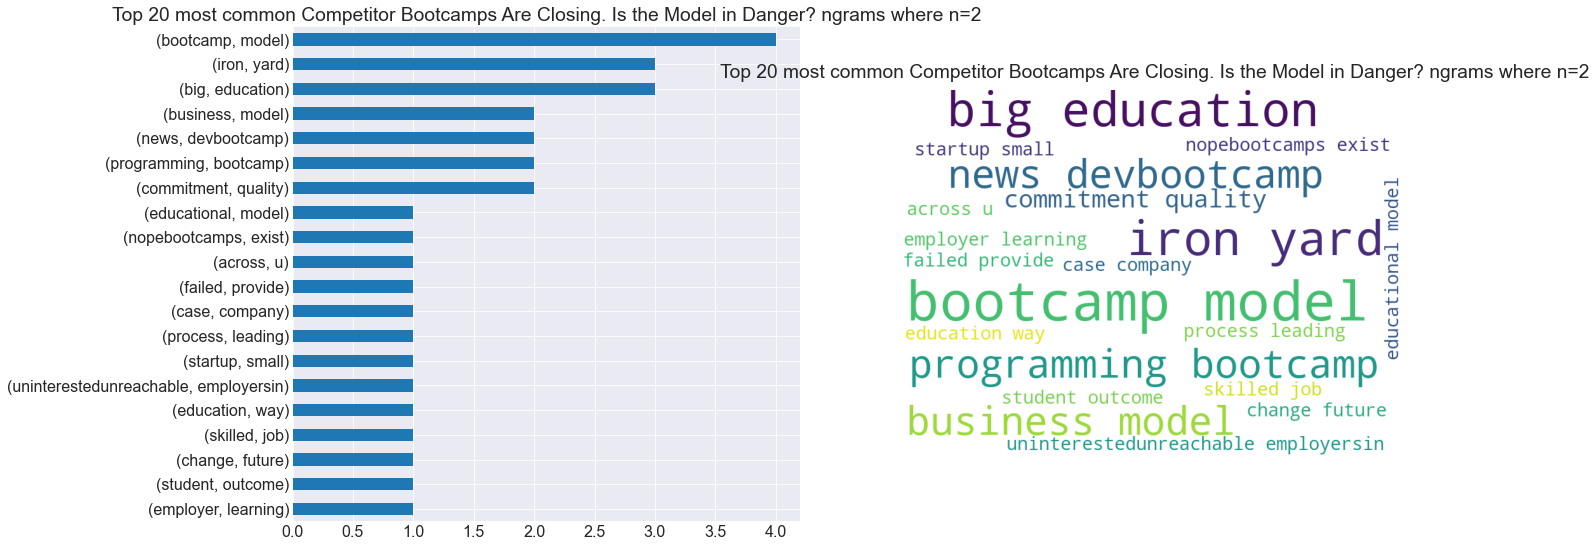

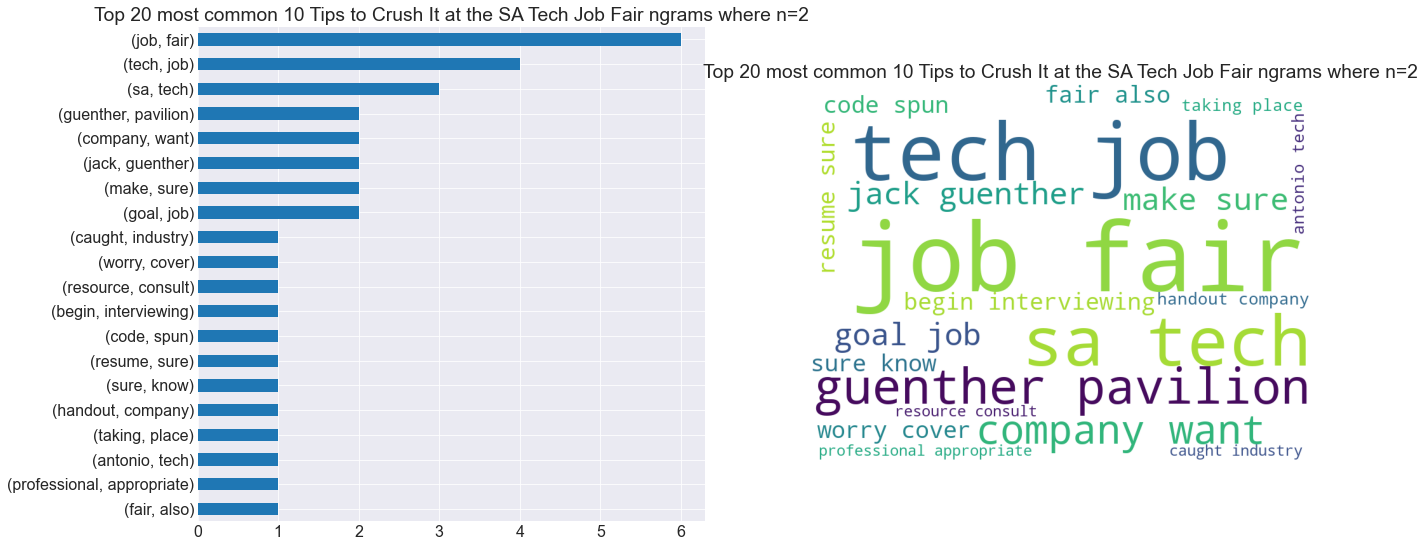

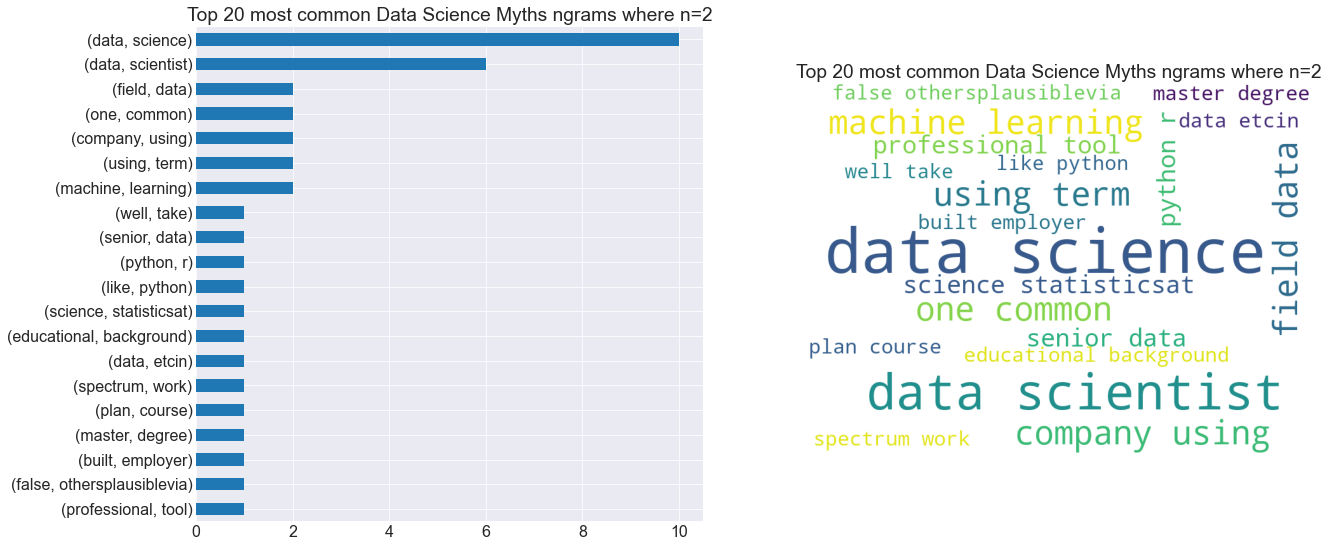

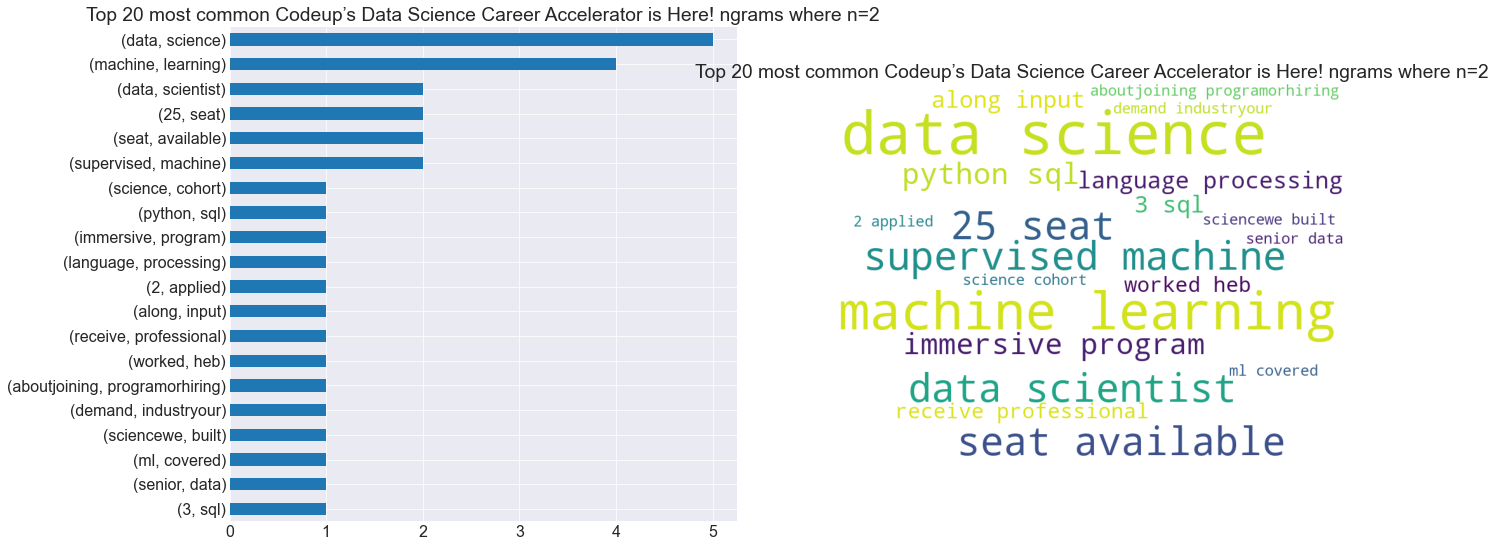

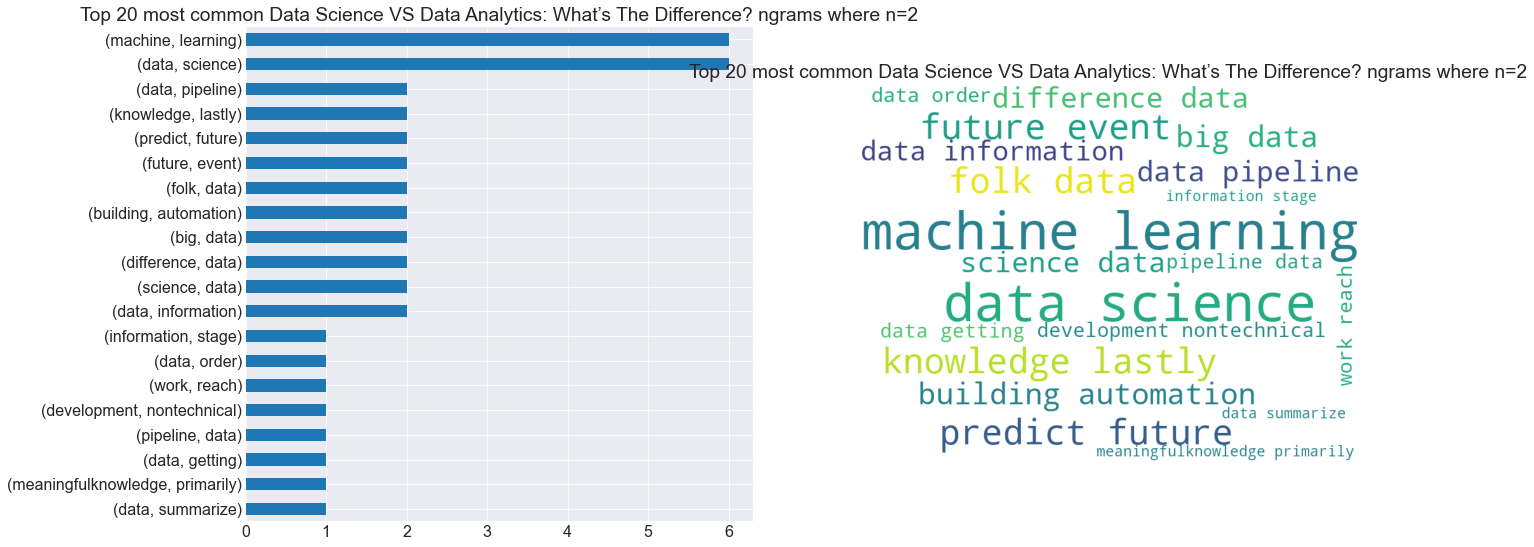

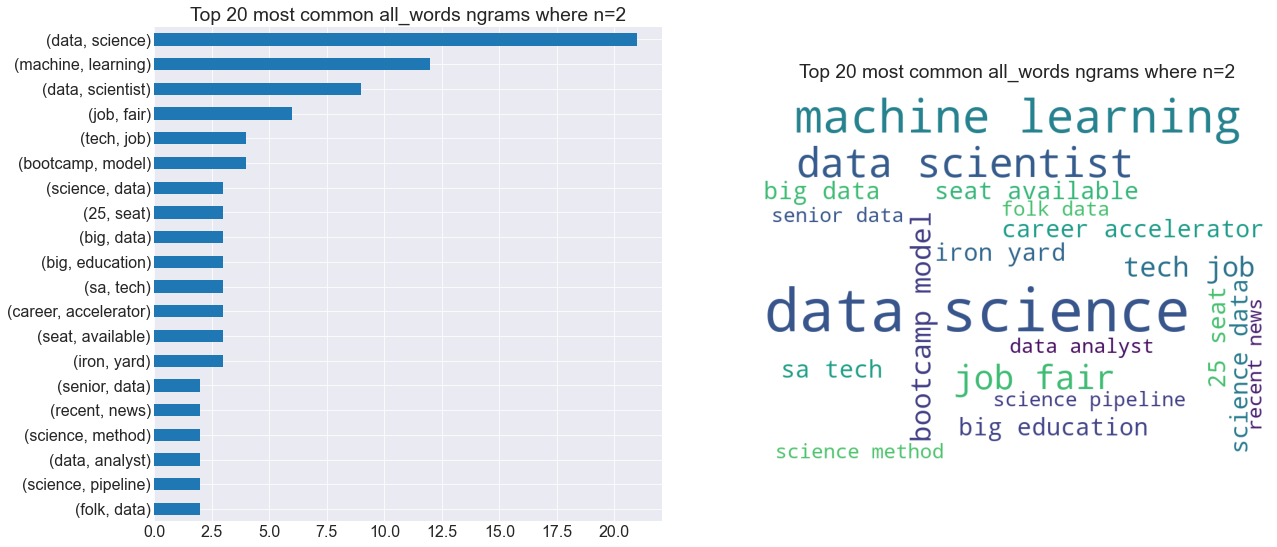

In [61]:
#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

In [65]:
## new features
new_articles['article_length'] = new_articles.lemmatized.apply(len)

new_articles.groupby('title').article_length.mean()

new_articles.article_length.plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [66]:
new_articles['word_count'] = new_articles.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [67]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=new_articles, y='word_count', x='article_length', hue='title')
plt.title( " article_length vs word_count")
plt.show()

<Figure size 1440x360 with 0 Axes>

In [69]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [70]:
new_articles['sentiment'] = new_articles.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])


In [71]:
new_articles

title  \
0  Codeup’s Data Science Career Accelerator is Here!   
1                                 Data Science Myths   
2  Data Science VS Data Analytics: What’s The Dif...   
3        10 Tips to Crush It at the SA Tech Job Fair   
4  Competitor Bootcamps Are Closing. Is the Model...   

                                             content      published_date  \
0  The rumors are true! The time has arrived. Cod...  September 30, 2018   
1  By Dimitri Antoniou and Maggie GiustData Scien...    October 31, 2018   
2  By Dimitri AntoniouA week ago, Codeuplaunched ...    October 17, 2018   
3  SA Tech Job FairThe third bi-annualSan Antonio...     August 14, 2018   
4  Competitor Bootcamps Are Closing. Is the Model...     August 14, 2018   

                                               clean  \
0  rumors true time arrived codeup officially ope...   
1  dimitri antoniou maggie giustdata science big ...   
2  dimitri antonioua week ago codeuplaunched imme...   
3  sa tech job fairthe third biannualsan antonio ...   
4  competitor bootcamps closing model dangeris pr...   

                                             stemmed  \
0  rumor true time arriv codeup offici open appli...   
1  dimitri antoni maggi giustdata scienc big data...   
2  dimitri antonioua week ago codeuplaunch immers...   
3  sa tech job fairth third biannualsan antonio t...   
4  competitor bootcamp close model dangeri progra...   

                                          lemmatized  article_length  \
0  rumor true time arrived codeup officially open...            1859   
1  dimitri antoniou maggie giustdata science big ...            2916   
2  dimitri antonioua week ago codeuplaunched imme...            2374   
3  sa tech job fairthe third biannualsan antonio ...            2724   
4  competitor bootcamps closing model dangeris pr...            1783   

   word_count  sentiment  
0         244     0.9779  
1         374     0.9865  
2         286     0.8126  
3         372     0.9975  
4         218     0.8807

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [19]:
categories = ["business", "sports", "technology", "entertainment", "science", "world"]
news_df = a.get_all_news_articles(categories)

In [20]:
news_df.head()

title  \
0  4 more Indian firms may produce COVID-19 vacci...   
1  Mazumdar-Shaw mocks posters congratulating box...   
2  Bill Gates warned Coachella about threat of a ...   
3  Tencent loses $60 billion as Chinese media cal...   
4  Nykaa Founder Falguni Nayar to become billiona...   

                                             content  category  
0  Health Minister Mansukh Mandaviya on Tuesday s...  business  
1  Biocon's Chairperson Kiran Mazumdar-Shaw in a ...  business  
2  Paul Tollett, the Co-founder of the Coachella ...  business  
3  Chinese technology conglomerate Tencent's shar...  business  
4  Falguni Nayar, a former investment banker who ...  business

In [21]:
 news_df=prep.prepare_data(news_df, 'content', ['said'])

In [22]:
news_df.head()

title  \
0  4 more Indian firms may produce COVID-19 vacci...   
1  Mazumdar-Shaw mocks posters congratulating box...   
2  Bill Gates warned Coachella about threat of a ...   
3  Tencent loses $60 billion as Chinese media cal...   
4  Nykaa Founder Falguni Nayar to become billiona...   

                                             content  category  \
0  Health Minister Mansukh Mandaviya on Tuesday s...  business   
1  Biocon's Chairperson Kiran Mazumdar-Shaw in a ...  business   
2  Paul Tollett, the Co-founder of the Coachella ...  business   
3  Chinese technology conglomerate Tencent's shar...  business   
4  Falguni Nayar, a former investment banker who ...  business   

                                               clean  \
0  health minister mansukh mandaviya tuesday four...   
1  biocons chairperson kiran mazumdarshaw tweet m...   
2  paul tollett cofounder coachella festival held...   
3  chinese technology conglomerate tencents share...   
4  falguni nayar former investment banker founded...   

                                             stemmed  \
0  health minist mansukh mandaviya tuesday four i...   
1  biocon chairperson kiran mazumdarshaw tweet mo...   
2  paul tollett cofound coachella festiv held ann...   
3  chines technolog conglomer tencent share slump...   
4  falguni nayar former invest banker found nykaa...   

                                          lemmatized  
0  health minister mansukh mandaviya tuesday four...  
1  biocons chairperson kiran mazumdarshaw tweet m...  
2  paul tollett cofounder coachella festival held...  
3  chinese technology conglomerate tencents share...  
4  falguni nayar former investment banker founded...

In [23]:
# change value counts to list of languages
list_cat = list(news_df.category.value_counts().index)

In [24]:
list_cat

['sports', 'science', 'world', 'entertainment', 'technology', 'business']

In [25]:
# join all the text of each categotyb
join_text ={}
for cat in list_cat :
    join_text[cat] = prep.basic_clean(' '.join(news_df[news_df.category == cat].lemmatized))

# add all words 
join_text['all_words']= prep.basic_clean(' '.join(news_df.lemmatized))

In [26]:
join_text.keys()

dict_keys(['sports', 'science', 'world', 'entertainment', 'technology', 'business', 'all_words'])

In [27]:

# create a word_count df
word_counts= pd.DataFrame()
for cat in join_text:
    word_counts[cat] = pd.Series(join_text[cat].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [28]:
word_counts.head()

sports  science  world  entertainment  technology  business  \
india        26        1      4              0           3         7   
team         19        2      0              1           0         0   
test         16        1      1              0           0         0   
england      15        0      0              0           0         0   
series       13        0      0              3           0         0   

         all_words  
india           41  
team            22  
test            18  
england         15  
series          16

In [29]:

import matplotlib as mpl

In [30]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1).sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

<Figure size 1440x1080 with 0 Axes>

<Figure size 936x576 with 0 Axes>

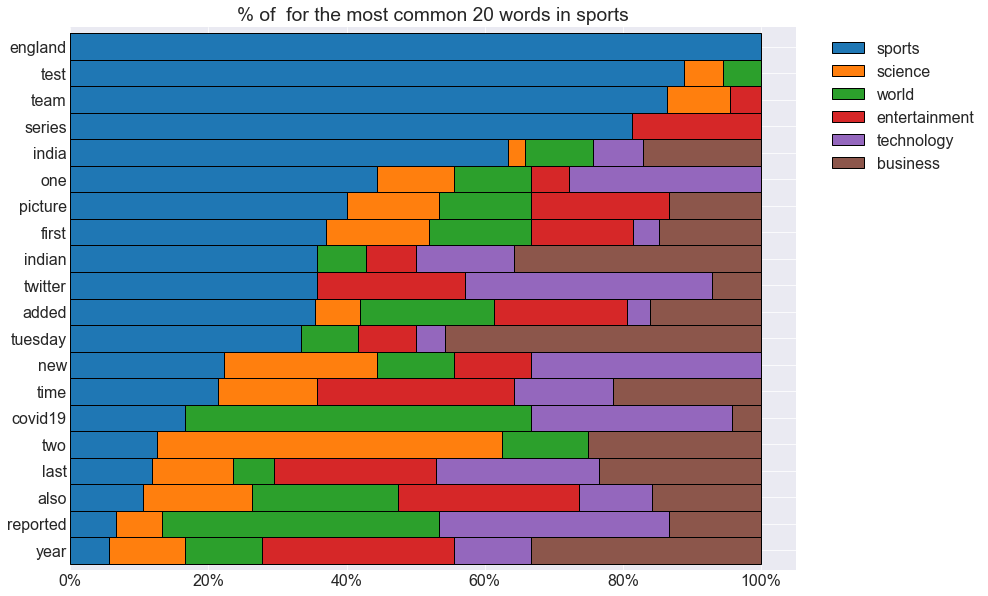

<Figure size 936x576 with 0 Axes>

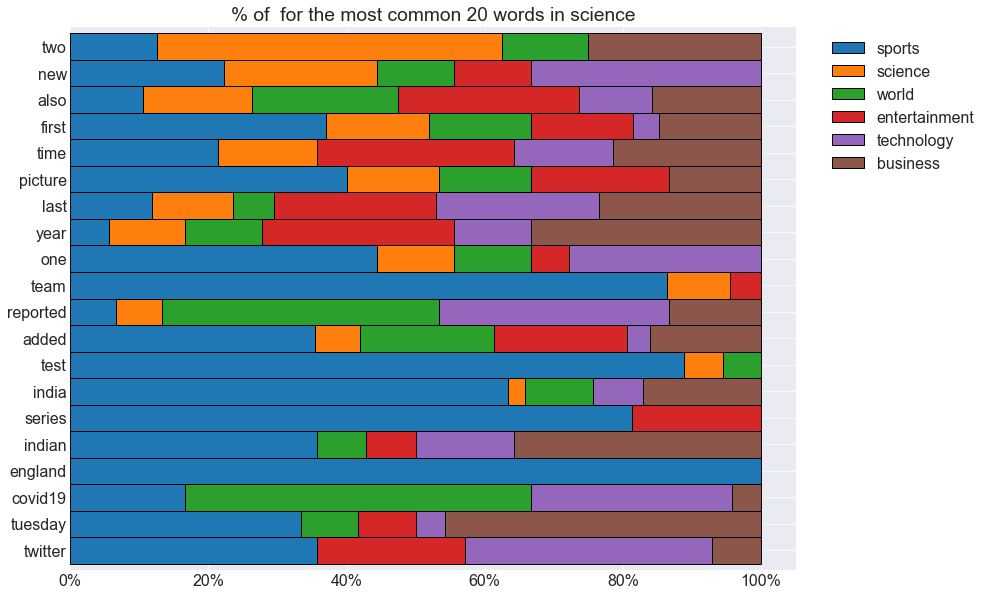

<Figure size 936x576 with 0 Axes>

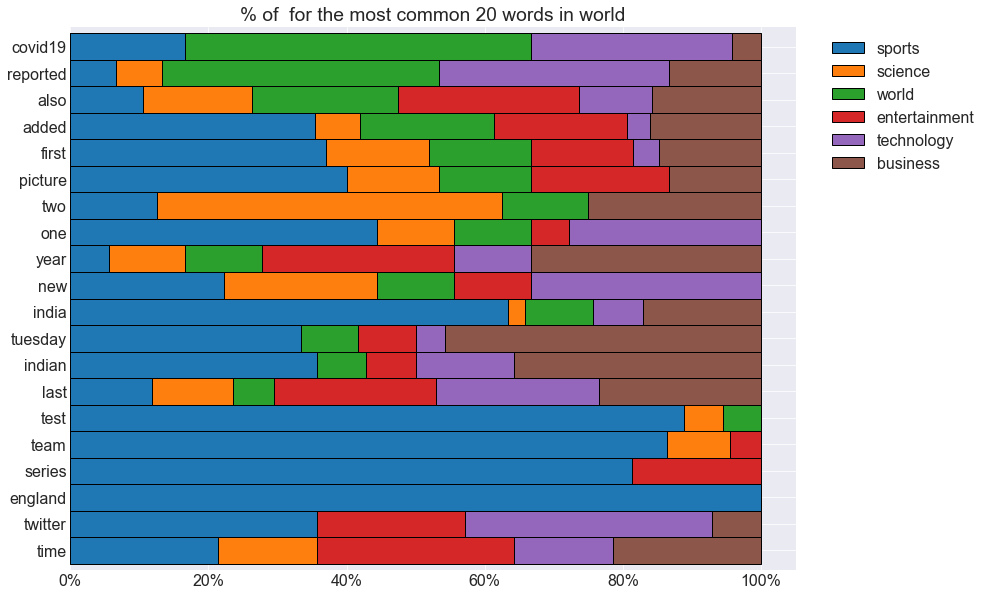

<Figure size 936x576 with 0 Axes>

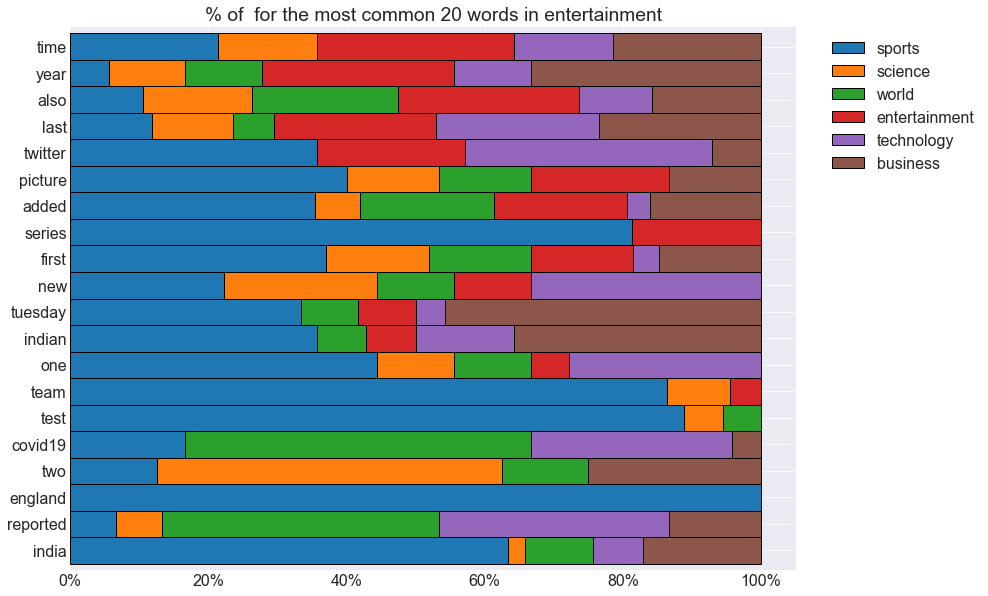

<Figure size 936x576 with 0 Axes>

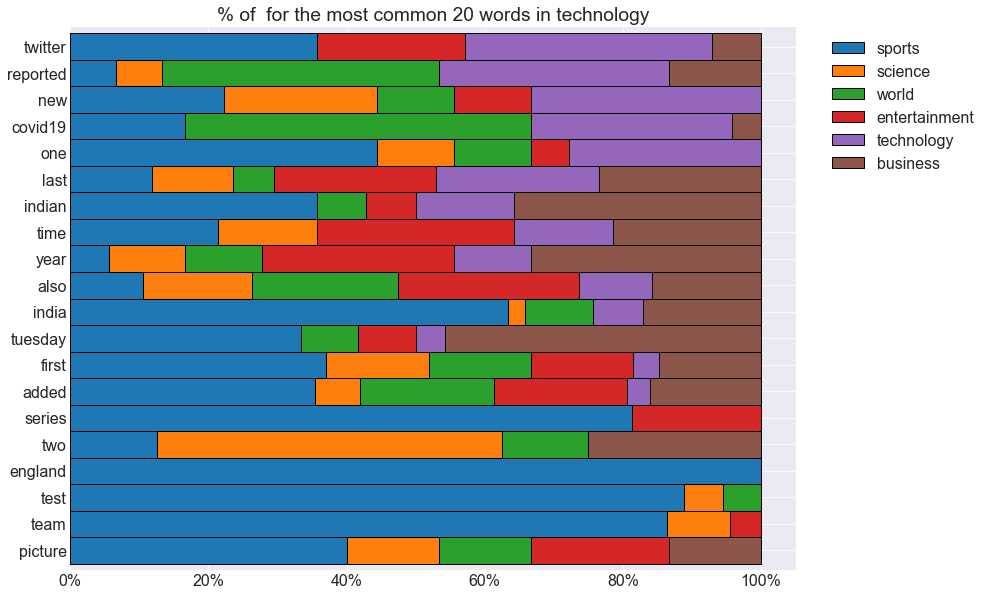

<Figure size 936x576 with 0 Axes>

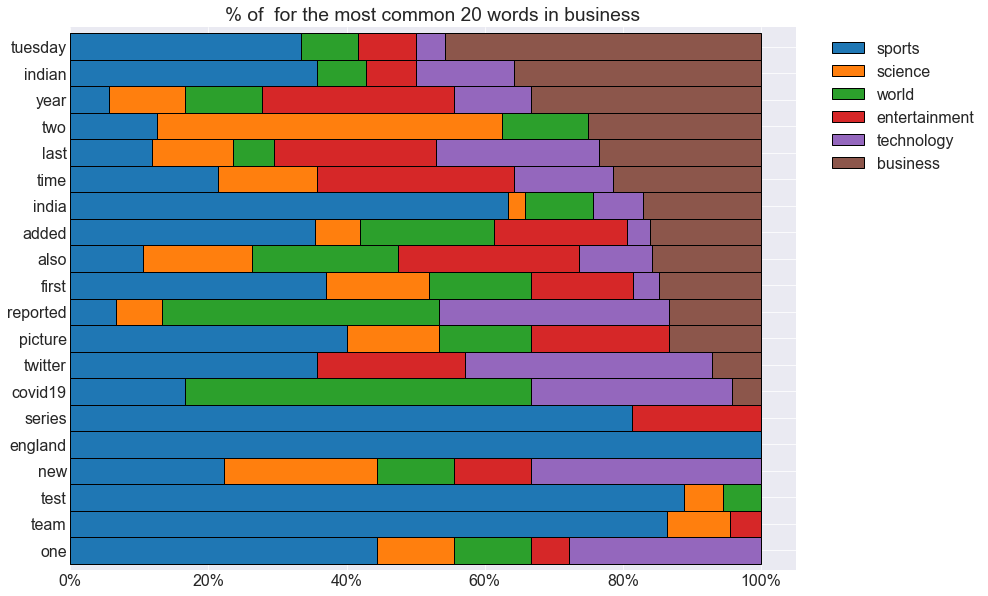

In [31]:
# Sorted by category 
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(13, 8))
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1).sort_values(by= column)
     .drop(columns='all_words')
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  for the most common 20 words in {column}')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

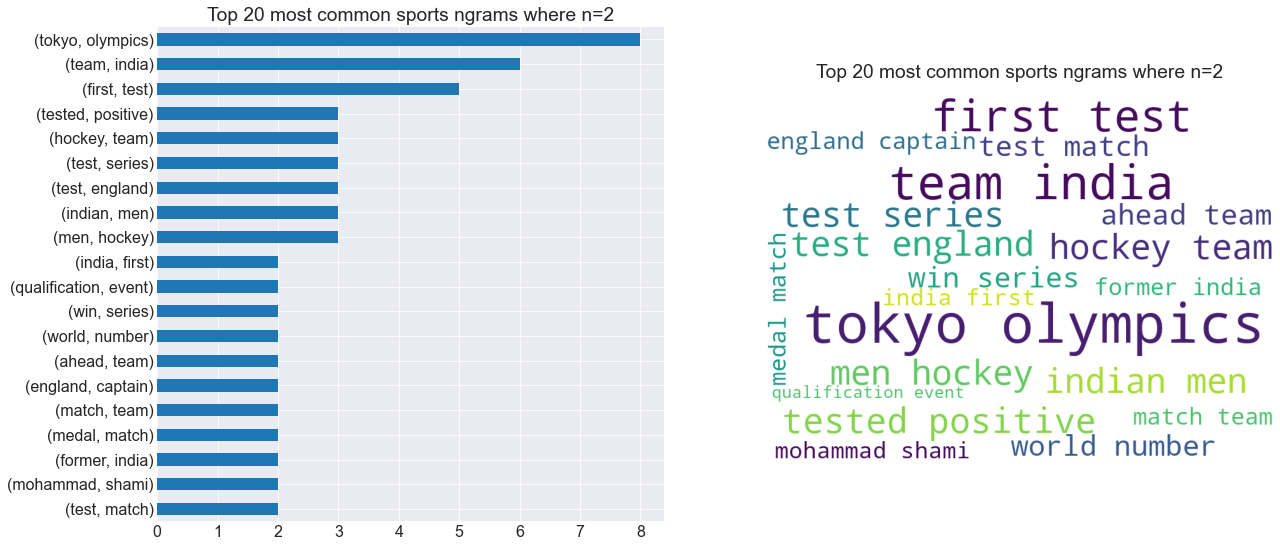

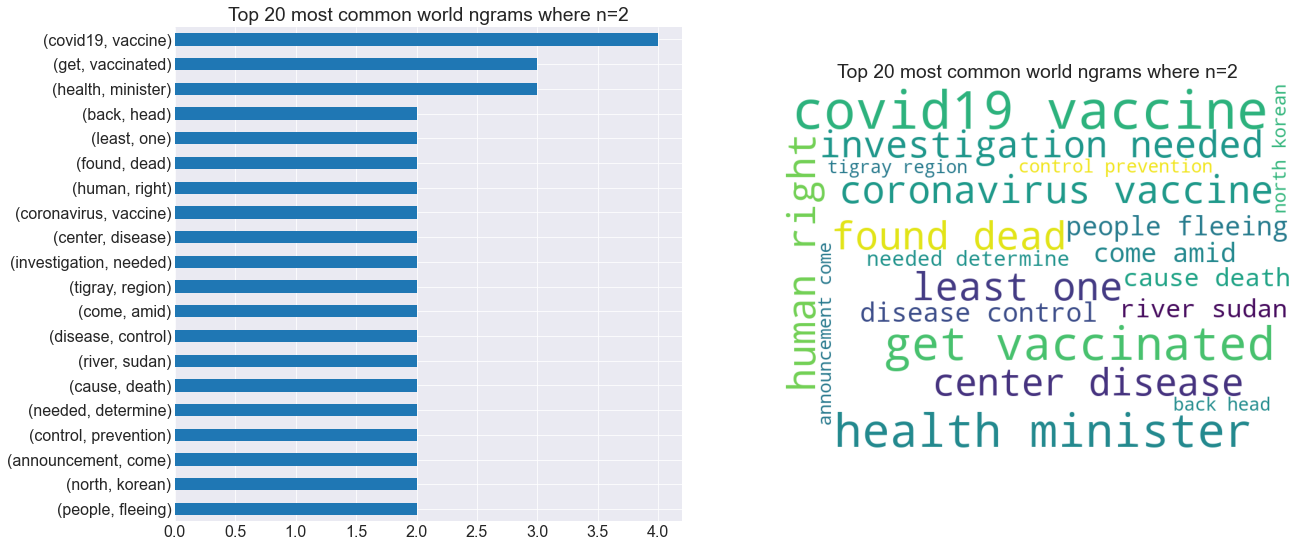

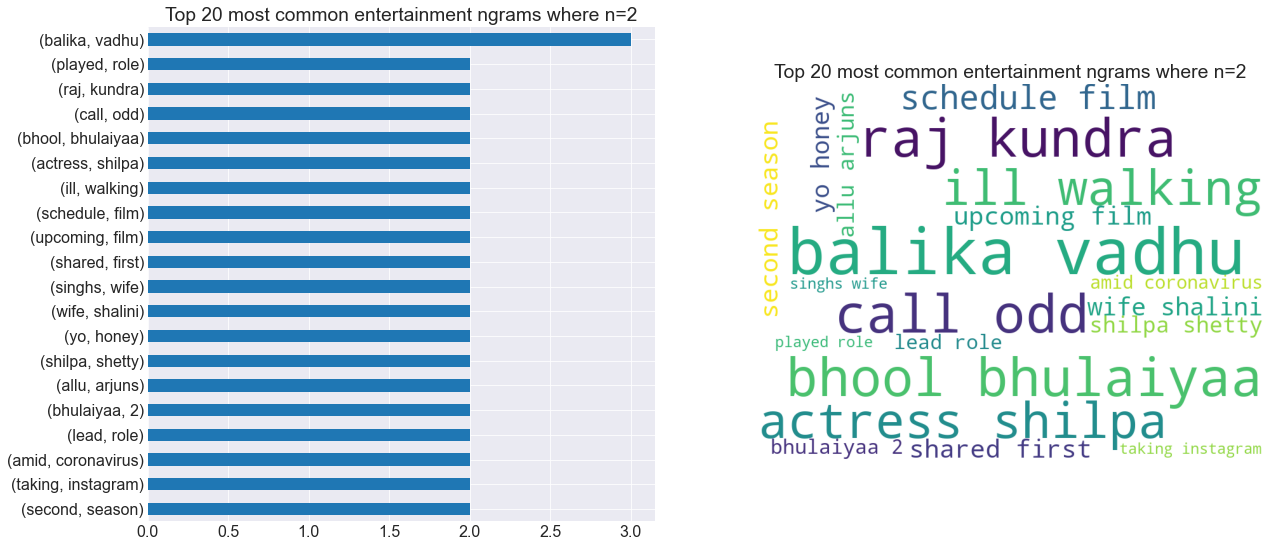

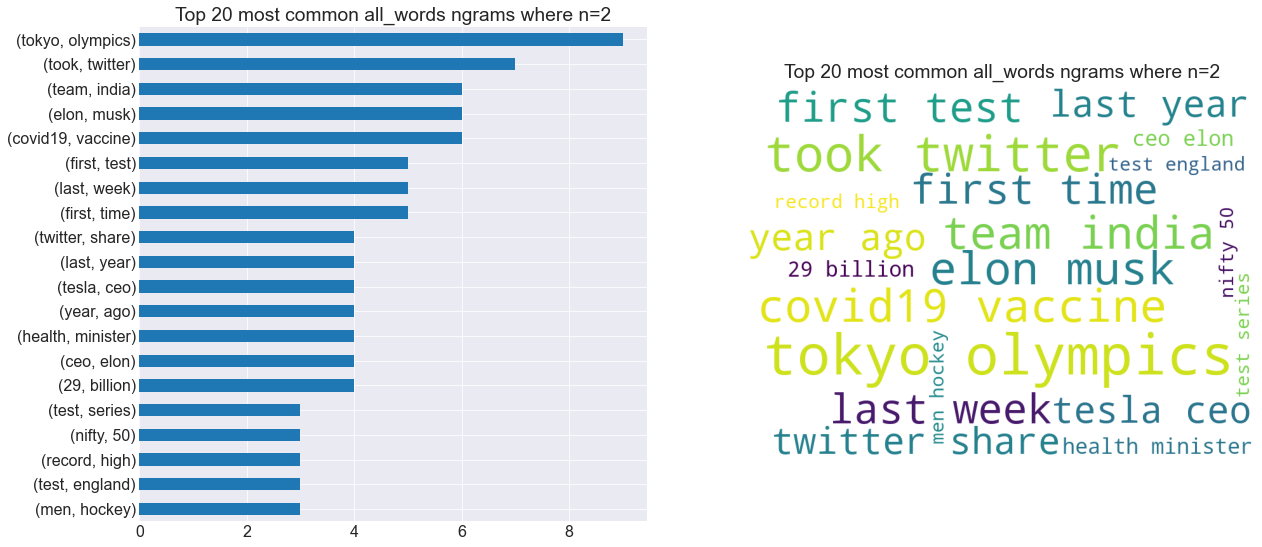

In [32]:

#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

In [33]:
## new features
news_df['article_length'] = news_df.lemmatized.apply(len)

news_df.groupby('category').article_length.mean()

news_df.article_length.plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [34]:
news_df['word_count'] = news_df.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

<Figure size 1440x360 with 0 Axes>

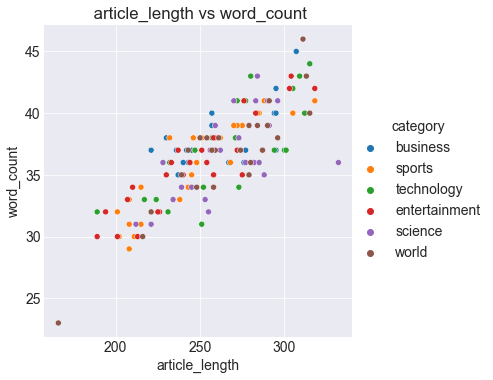

In [35]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=news_df, y='word_count', x='article_length', hue='category')
plt.title( " article_length vs word_count")
plt.show()

In [36]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [38]:
news_df['sentiment'] = news_df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])


In [39]:
news_df.head()

title  \
0  4 more Indian firms may produce COVID-19 vacci...   
1  Mazumdar-Shaw mocks posters congratulating box...   
2  Bill Gates warned Coachella about threat of a ...   
3  Tencent loses $60 billion as Chinese media cal...   
4  Nykaa Founder Falguni Nayar to become billiona...   

                                             content  category  \
0  Health Minister Mansukh Mandaviya on Tuesday s...  business   
1  Biocon's Chairperson Kiran Mazumdar-Shaw in a ...  business   
2  Paul Tollett, the Co-founder of the Coachella ...  business   
3  Chinese technology conglomerate Tencent's shar...  business   
4  Falguni Nayar, a former investment banker who ...  business   

                                               clean  \
0  health minister mansukh mandaviya tuesday four...   
1  biocons chairperson kiran mazumdarshaw tweet m...   
2  paul tollett cofounder coachella festival held...   
3  chinese technology conglomerate tencents share...   
4  falguni nayar former investment banker founded...   

                                             stemmed  \
0  health minist mansukh mandaviya tuesday four i...   
1  biocon chairperson kiran mazumdarshaw tweet mo...   
2  paul tollett cofound coachella festiv held ann...   
3  chines technolog conglomer tencent share slump...   
4  falguni nayar former invest banker found nykaa...   

                                          lemmatized  article_length  \
0  health minister mansukh mandaviya tuesday four...             295   
1  biocons chairperson kiran mazumdarshaw tweet m...             268   
2  paul tollett cofounder coachella festival held...             271   
3  chinese technology conglomerate tencents share...             315   
4  falguni nayar former investment banker founded...             243   

   word_count  sentiment  
0          37     0.0000  
1          36     0.4767  
2          38    -0.3182  
3          44     0.8481  
4          36     0.7351

In [40]:
news_df.groupby('category')[['sentiment']].median()

sentiment
category                
business          0.3071
entertainment     0.1280
science           0.1220
sports            0.6705
technology        0.1531
world            -0.1280

In [41]:
news_df.groupby('category')[['sentiment']].mean()

sentiment
category                
business        0.220625
entertainment   0.141732
science         0.022072
sports          0.602892
technology      0.083828
world          -0.212452

In [42]:
news_df.groupby('category')[['sentiment']].min()

sentiment
category                
business         -0.7003
entertainment    -0.9246
science          -0.8957
sports           -0.4939
technology       -0.8832
world            -0.9788

In [43]:
news_df.groupby('category')[['sentiment']].max()

sentiment
category                
business          0.8481
entertainment     0.9393
science           0.6908
sports            0.9413
technology        0.8720
world             0.7579

In [44]:
#good news!!
news_df.nlargest(5, 'sentiment')

title  \
36  India will win two or three matches in 5-Test ...   
44  India's winning chances will be more if Rohit ...   
78  Dimpy Chacha thanks for always having my back:...   
35  Belgium played better than India in 3rd, 4th q...   
95  You'll overcome this: Madhavan supports Shilpa...   

                                              content       category  \
36  Cricketer Harbhajan Singh has backed India to ...         sports   
44  Ahead of Team India's first Test match against...         sports   
78  Speaking about working with his uncle Abhay De...  entertainment   
35  After Indian men's hockey team's 2-5 loss in s...         sports   
95  After actress Shilpa Shetty shared her first s...  entertainment   

                                                clean  \
36  cricketer harbhajan singh backed india win fiv...   
44  ahead team indias first test match england exi...   
78  speaking working uncle abhay deol upcoming fil...   
35  indian mens hockey teams 25 loss semifinals be...   
95  actress shilpa shetty shared first statement f...   

                                              stemmed  \
36  cricket harbhajan singh back india win fivetes...   
44  ahead team india first test match england exin...   
78  speak work uncl abhay deol upcom film velley a...   
35  indian men hockey team 25 loss semifin belgium...   
95  actress shilpa shetti share first statement fo...   

                                           lemmatized  article_length  \
36  cricketer harbhajan singh backed india win fiv...             208   
44  ahead team india first test match england exin...             215   
78  speaking working uncle abhay deol upcoming fil...             213   
35  indian men hockey team 25 loss semifinal belgi...             245   
95  actress shilpa shetty shared first statement f...             244   

    word_count  sentiment  
36          33     0.9413  
44          34     0.9393  
78          30     0.9393  
35          35     0.9260  
95          36     0.9217

In [45]:
#bad news :(
news_df.nsmallest(5, 'sentiment')

title  \
139  4 policemen who responded to US Capitol attack...   
144  UK summons Iranian Ambassador over Oman oil ta...   
138  100-year-old ex-Nazi camp guard to go on trial...   
147  Exiled Belarusian activist found hanged in a p...   
98   I'd get calls at odd hours where people would ...   

                                               content       category  \
139  Two more police officers who responded to Janu...          world   
144  The UK has summoned the Iranian Ambassador to ...          world   
138  A 100-year-old former Nazi concentration camp ...          world   
147  A Belarusian activist living in exile in Ukrai...          world   
98   Manoj Bajpayee said that he used to get calls ...  entertainment   

                                                 clean  \
139  two police officers responded january 6 us cap...   
144  uk summoned iranian ambassador london mohsen b...   
138  100yearold former nazi concentration camp guar...   
147  belarusian activist living exile ukraine found...   
98   manoj bajpayee used get calls odd hours people...   

                                               stemmed  \
139  two polic offic respond januari 6 us capitol r...   
144  uk summon iranian ambassador london mohsen bah...   
138  100yearold former nazi concentr camp guard sta...   
147  belarusian activist live exil ukrain found han...   
98   manoj bajpaye use get call odd hour peopl woul...   

                                            lemmatized  article_length  \
139  two police officer responded january 6 u capit...             254   
144  uk summoned iranian ambassador london mohsen b...             239   
138  100yearold former nazi concentration camp guar...             274   
147  belarusian activist living exile ukraine found...             287   
98   manoj bajpayee used get call odd hour people w...             194   

     word_count  sentiment  
139          38    -0.9788  
144          35    -0.9674  
138          37    -0.9517  
147          37    -0.9477  
98           32    -0.9246